# MLP vs CNN

## Introduction

In this notebook, I will make a short comparison between the use of a standard MLP (multi-layer perceptron, or feed forward network, or vanilla neural network, whatever name suits your fancy) and a CNN (convolutional neural network) for image recognition. It'll be clear that, although an MLP could be used, CNN's are much more suited for this task, since they keep the dimensional information of a picture into account, something MLP's do not do.

When thinking about providing this notebook as an example, I decided to not make it too beginner-friendly. Thus, I will not provide a full an thorough explanation of most of the basic concepts like perceptrons, layers, logistic regression, activation or cost functions, gradient descent, overfitting and possible counter-measures against it, and so on. There are nowadays so many courses to be found, like Udacity School of AI(which I highly recommend!), or Coursera Machine Learning, where you can learn all about the basic concepts and even implement some examples. Now, I don't have too much in-depth experience with online AI courses other than from those 2 sources, but what I did notice when looking at other courses is that a lot of them do explain the core concepts and theory behind it all, but fail to convert that into actual applicable skills (the Udacity ones being an exception to that, again, invest in them, it's well worth it).

So what I decided to go for is to limit the theory to a minimum and focus on application with this notebook. However, I will explain some concepts from time to time, but you'd do best to build up some basic theoretical knowledge about core concepts. Together with the explanation I will give here, that should be enough to understand everything that is going on. Also, no fear, this is by no means complicated stuff, but just a simple example, comparing MLP's with CNN's.

## The dataset

To aid in the demonstration, I'll use the CIFAR10 dataset. This dataset consists of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images, and is included in the installation of Keras. I used TensorFlow as the backend, TensorFlow-GPU to be more specific (to shorten the training time). Of course you can use the standard version of TensorFlow that will run on the CPU, but that will definitely take a bit more time. Alternatively, run this notebook in the cloud. AWS is a good start, they have several GPU machine learning options to choose from. Other Python libraries I used are NumPy and Matplotlib, which are basically the usual suspects when doing this line of work.


In [2]:
import numpy as np
from collections import namedtuple as nt
import matplotlib.pyplot as plt
%matplotlib inline
Data = nt("Data", "x_train y_train x_valid y_valid x_test y_test")

In [3]:
def visualize_data(data):
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, ((i % per_row) + per_row) % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row), pos, xticks=[], yticks=[])
        ax.imshow(np.squeeze(data.x_train[i]))
    plt.show()

In [27]:
# A chart showing how the accuracy for the training and tests sets evolved
def visualize_training(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    # A chart showing our training vs validation loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

## MLP

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10

Using TensorFlow backend.


In [6]:
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

In [7]:
def build_mlp(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Flatten(input_shape=data.x_train.shape[1:]))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

In [8]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
data = Data(x_train, y_train, None, None, x_test, y_test)

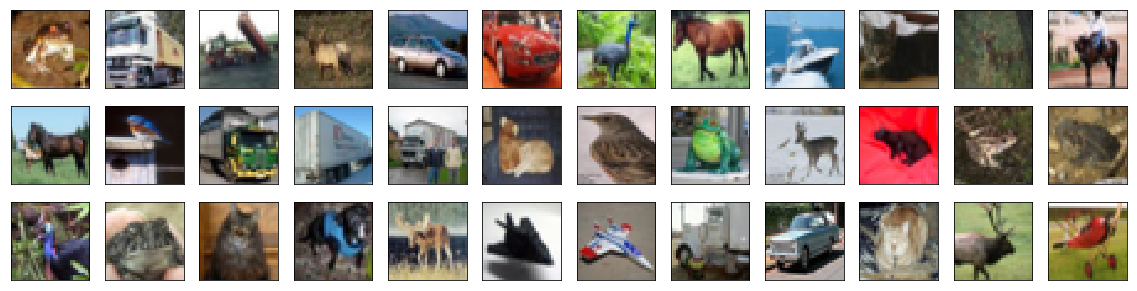

In [9]:
# Visualize the data
visualize_data(data)

In [10]:
# Preprocess the data
categories = len(np.unique(data.y_train))
print("Shape of x_train pre-processing: ", data.x_train.shape)
print("Shape of y_train pre-processing: ", data.y_train.shape)
processed_data = preprocess(data, categories)
print("Shape of x_train post-processing: ", processed_data.x_train.shape)
print("Shape of y_train post-processing: ", processed_data.y_train.shape)
print("Shape of x_valid post-processing: ", processed_data.x_valid.shape)
print("Shape of y_valid post-processing: ", processed_data.y_valid.shape)
print("Shape of x_test post-processing: ", processed_data.x_test.shape)
print("Shape of y_test post-processing: ", processed_data.y_test.shape)

Shape of x_train pre-processing:  (50000, 32, 32, 3)
Shape of y_train pre-processing:  (50000, 1)
Shape of x_train post-processing:  (45000, 32, 32, 3)
Shape of y_train post-processing:  (45000, 10)
Shape of x_valid post-processing:  (5000, 32, 32, 3)
Shape of y_valid post-processing:  (5000, 10)
Shape of x_test post-processing:  (10000, 32, 32, 3)
Shape of y_test post-processing:  (10000, 10)


In [19]:
# Build mlp
mlp = build_mlp(processed_data, categories)
print("MLP architecture:")
mlp.summary()

MLP architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
________________________________________________

In [17]:
mlp_weights_path = "saved_weights/cifar10_mlp_best.hdf5"

In [23]:
# Train the mlp
checkpointer_mlp = ModelCheckpoint(filepath=mlp_weights_path, verbose=1, save_best_only=True)
hist_mlp = mlp.fit(processed_data.x_train, processed_data.y_train, batch_size=32, 
                   epochs=100, validation_data=(processed_data.x_valid, processed_data.y_valid),
                   callbacks=[checkpointer_mlp], shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 15s 332us/step - loss: 1.7700 - acc: 0.3732 - val_loss: 1.7557 - val_acc: 0.3632

Epoch 00001: val_loss improved from inf to 1.75572, saving model to saved_weights/cifar10_mlp_best.hdf5
Epoch 2/100
45000/45000 [==============================] - 14s 321us/step - loss: 1.7658 - acc: 0.3761 - val_loss: 1.6900 - val_acc: 0.3952

Epoch 00002: val_loss improved from 1.75572 to 1.69003, saving model to saved_weights/cifar10_mlp_best.hdf5
Epoch 3/100
45000/45000 [==============================] - 14s 321us/step - loss: 1.7655 - acc: 0.3772 - val_loss: 1.9421 - val_acc: 0.3354

Epoch 00003: val_loss did not improve from 1.69003
Epoch 4/100
45000/45000 [==============================] - 15s 324us/step - loss: 1.7621 - acc: 0.3775 - val_loss: 1.7057 - val_acc: 0.3758

Epoch 00004: val_loss did not improve from 1.69003
Epoch 5/100
45000/45000 [==============================] - 15s 326us/step


Epoch 00042: val_loss did not improve from 1.69003
Epoch 43/100
45000/45000 [==============================] - 14s 322us/step - loss: 1.8502 - acc: 0.3615 - val_loss: 1.8525 - val_acc: 0.3416

Epoch 00043: val_loss did not improve from 1.69003
Epoch 44/100
45000/45000 [==============================] - 15s 323us/step - loss: 1.8456 - acc: 0.3601 - val_loss: 1.8624 - val_acc: 0.3488

Epoch 00044: val_loss did not improve from 1.69003
Epoch 45/100
45000/45000 [==============================] - 15s 322us/step - loss: 1.8427 - acc: 0.3599 - val_loss: 1.8718 - val_acc: 0.3576

Epoch 00045: val_loss did not improve from 1.69003
Epoch 46/100
45000/45000 [==============================] - 14s 322us/step - loss: 1.8552 - acc: 0.3539 - val_loss: 1.9445 - val_acc: 0.3350

Epoch 00046: val_loss did not improve from 1.69003
Epoch 47/100
45000/45000 [==============================] - 15s 324us/step - loss: 1.8532 - acc: 0.3586 - val_loss: 1.9958 - val_acc: 0.3362

Epoch 00047: val_loss did not impr

45000/45000 [==============================] - 14s 322us/step - loss: 1.8637 - acc: 0.3521 - val_loss: 1.9422 - val_acc: 0.3258

Epoch 00085: val_loss did not improve from 1.69003
Epoch 86/100
45000/45000 [==============================] - 15s 325us/step - loss: 1.8615 - acc: 0.3542 - val_loss: 2.0745 - val_acc: 0.3462

Epoch 00086: val_loss did not improve from 1.69003
Epoch 87/100
45000/45000 [==============================] - 15s 329us/step - loss: 1.8536 - acc: 0.3544 - val_loss: 2.0454 - val_acc: 0.3586

Epoch 00087: val_loss did not improve from 1.69003
Epoch 88/100
45000/45000 [==============================] - 15s 325us/step - loss: 1.8678 - acc: 0.3540 - val_loss: 1.9409 - val_acc: 0.3344

Epoch 00088: val_loss did not improve from 1.69003
Epoch 89/100
45000/45000 [==============================] - 15s 323us/step - loss: 1.8691 - acc: 0.3593 - val_loss: 2.1169 - val_acc: 0.3752

Epoch 00089: val_loss did not improve from 1.69003
Epoch 90/100
45000/45000 [======================

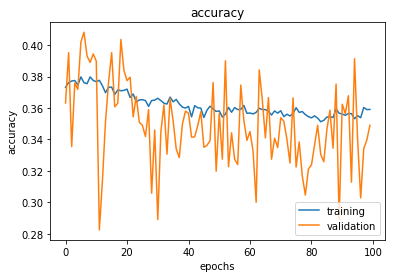

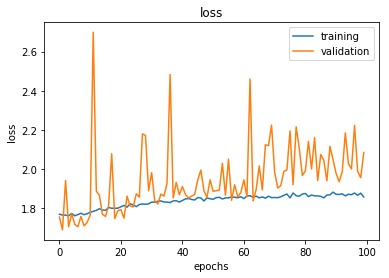

In [28]:
visualize_training(hist_mlp)

In [20]:
mlp.load_weights(mlp_weights_path)
score_mlp = mlp.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)

## Convolutional Neural Networks

In [11]:
from keras.layers import Conv2D, MaxPooling2D

In [12]:
def build_cnn(data, categories):
    # Create model architecture
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=data.x_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    return model

In [13]:
# Build cnn
cnn = build_cnn(processed_data, categories)
print("CNN architecture:")
cnn.summary()

CNN architecture:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0  

In [ ]:
cnn_weights_path = "saved_weights/cifar10_cnn_best.hdf5"

In [14]:
# Train the cnn
checkpointer_cnn = ModelCheckpoint(cnn_weights_path, verbose=1, save_best_only=True)
hist_cnn = cnn.fit(processed_data.x_train, processed_data.y_train, batch_size=32, 
                   epochs=20, validation_data=(processed_data.x_valid, processed_data.y_valid),
                   callbacks=[checkpointer_cnn])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 15s 323us/step - loss: 1.6070 - acc: 0.4151 - val_loss: 1.3759 - val_acc: 0.5036

Epoch 00001: val_loss improved from inf to 1.37590, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 2/20
45000/45000 [==============================] - 12s 272us/step - loss: 1.2740 - acc: 0.5452 - val_loss: 1.2371 - val_acc: 0.5596

Epoch 00002: val_loss improved from 1.37590 to 1.23708, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 3/20
45000/45000 [==============================] - 12s 271us/step - loss: 1.1471 - acc: 0.5931 - val_loss: 1.0572 - val_acc: 0.6186

Epoch 00003: val_loss improved from 1.23708 to 1.05716, saving model to saved_weights/cifar10_cnn_best.hdf5
Epoch 4/20
45000/45000 [==============================] - 12s 269us/step - loss: 1.0750 - acc: 0.6218 - val_loss: 1.0224 - val_acc: 0.6486

Epoch 00004: val_loss improved from 1.05716 to 1.02239, saving model to

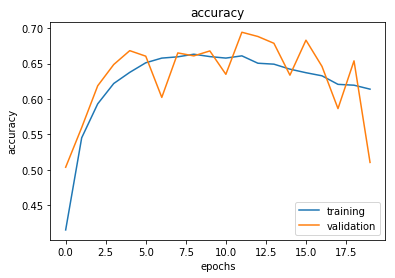

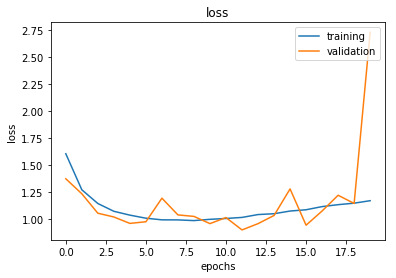

In [29]:
visualize_training(hist_cnn)

In [25]:
cnn.load_weights(cnn_weights_path)
score_cnn = cnn.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)

In [26]:
# Compare the scores
print("Accuracy mlp: {0:.2f}%".format(score_mlp[1] * 100))
print("Accuracy cnn: {0:.2f}%".format(score_cnn[1] * 100))

Accuracy mlp: 40.11%
Accuracy cnn: 68.81%
